In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

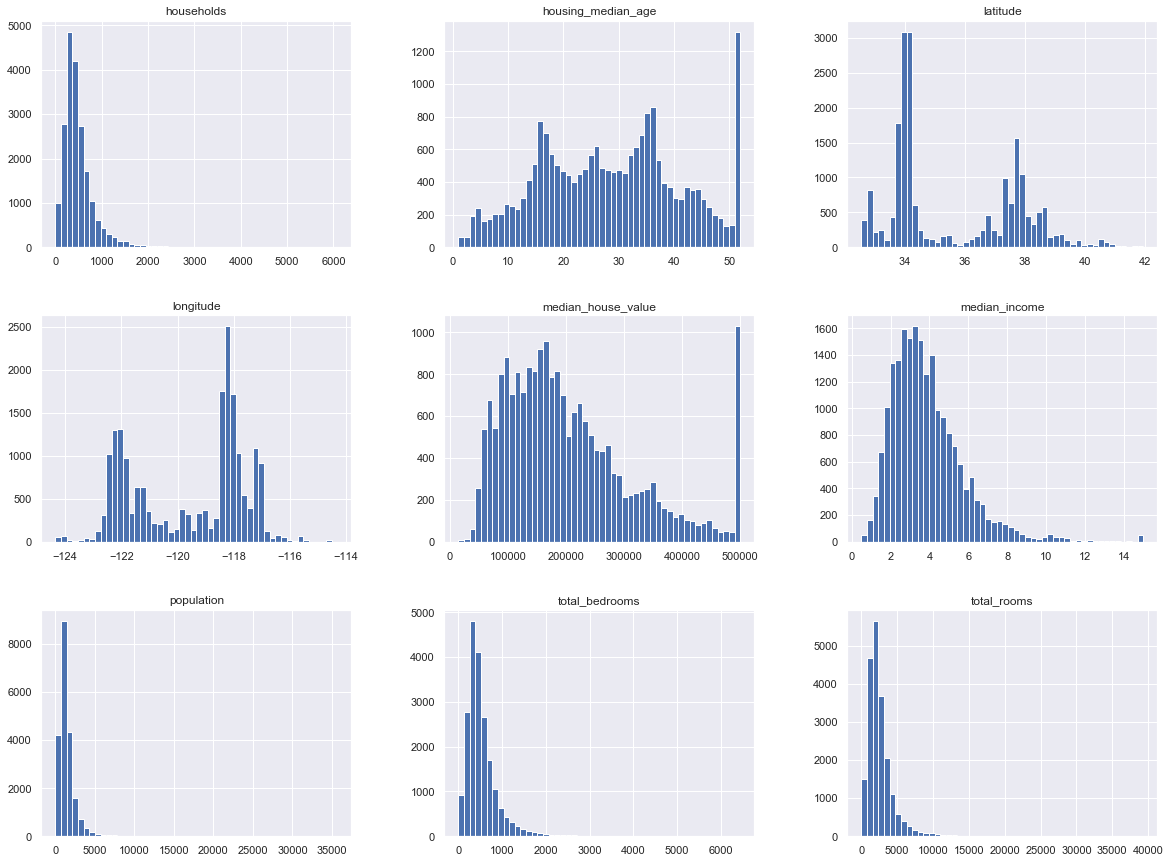

In [7]:
%matplotlib inline
data.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(data,test_size=0.2, random_state=20)

In [9]:
data['income_cat']=pd.cut(data["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

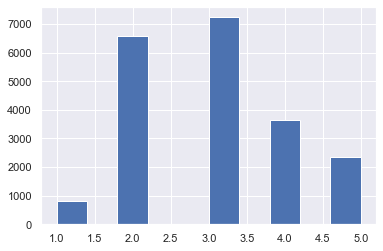

In [10]:
data['income_cat'].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=20)
for train_index,test_index in split.split(data,data['income_cat']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [12]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

### Removing income_cat

In [13]:
for set_ in(strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

 ### Visualizing Graphical Data

In [14]:
housing=strat_train_set.copy()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


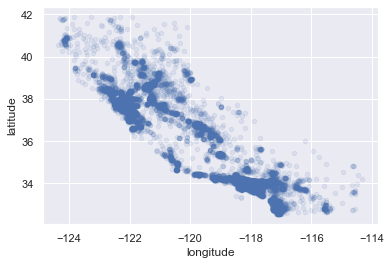

In [17]:
housing.plot(kind='scatter',x='longitude', y='latitude',alpha=0.1)

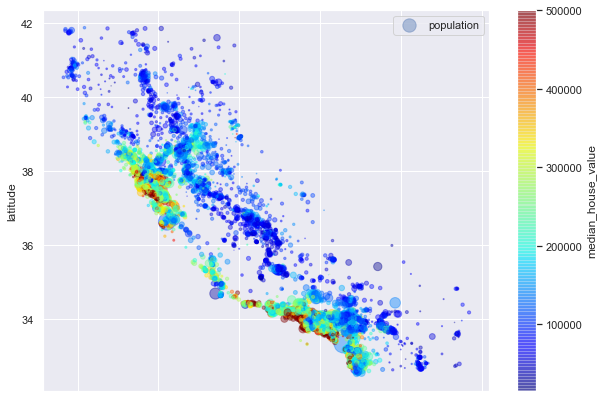

In [19]:
housing.plot(kind='scatter',x='longitude', y='latitude',alpha=0.4,s=housing['population']/100,label='population',figsize=(10,7),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

### Correlation

In [20]:
corr_matrix=housing.corr()

In [22]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686376
total_rooms           0.131834
housing_median_age    0.116039
households            0.063218
total_bedrooms        0.046387
population           -0.030128
longitude            -0.047133
latitude             -0.141979
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D679F8FF08>,
      dtype=object)

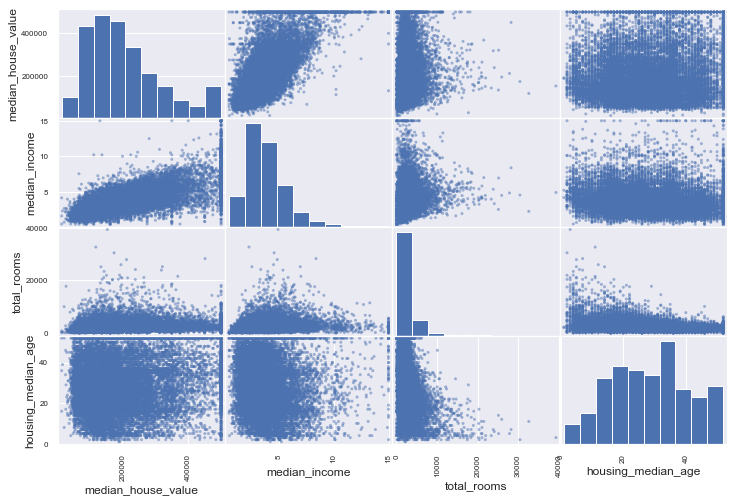

In [25]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


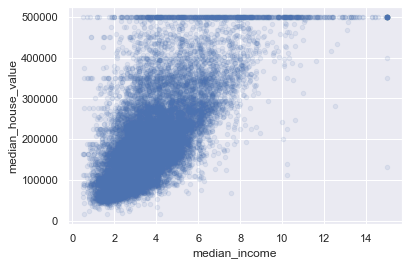

In [26]:
housing.plot(kind='scatter',x='median_income', y='median_house_value', alpha=0.1)

### Attribute Combinations

In [27]:
housing["rooms_per_household"]= housing['total_rooms']/housing['households']
housing["bedrooms_per_room"]= housing['total_bedrooms']/housing['total_rooms']
housing["population_per_household"]= housing['population']/housing['households']

In [29]:
corr_matrix= housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686376
rooms_per_household         0.144659
total_rooms                 0.131834
housing_median_age          0.116039
households                  0.063218
total_bedrooms              0.046387
population_per_household   -0.021894
population                 -0.030128
longitude                  -0.047133
latitude                   -0.141979
bedrooms_per_room          -0.254494
Name: median_house_value, dtype: float64

#### revert to clean training set
###### we don't apply transformations to predictors and targets

In [31]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels= strat_train_set['median_house_value'].copy()

### Data Cleaning

In [33]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

In [34]:
# since it can only be applied on numerical value, we remove categorical data
housing_num=housing.drop("ocean_proximity",axis=1)

In [35]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [36]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  435.    , 1163.    ,
        410.    ,    3.5375])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2127.    ,  435.    , 1163.    ,
        410.    ,    3.5375])

In [39]:
X=imputer.transform(housing_num)

In [41]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [44]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
5266,<1H OCEAN
5621,NEAR OCEAN
10241,<1H OCEAN
19767,INLAND
944,NEAR BAY
6543,<1H OCEAN
11006,<1H OCEAN
7583,<1H OCEAN
5292,<1H OCEAN
16028,NEAR BAY


In [49]:
from sklearn.preprocessing import OrdinalEncoder   # to convert categories from text to numbers

ordinal_encoder= OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [4.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
# applying one hot encoding to avoid confusions

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [55]:
# the above is stored as SciPy Sparse matrix,to convert it to dense numpy array-
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

### custom transformers

In [58]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix, population_ix, households_ix= 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X, y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room= X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return  np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs= attr_adder.transform(housing.values)

## Feature Scaling